## Stock market prediction using YFinance dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Import Data

In [2]:
df = yf.download('AAPL', start='2010-01-01', end='2025-07-20')
df.head()

C:\Users\Achilles\AppData\Local\Temp\ipykernel_51852\1162261790.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2010-01-01', end='2025-07-20')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.431896,6.446622,6.382907,6.414464,493729600
2010-01-05,6.443016,6.479382,6.409054,6.449628,601904800
2010-01-06,6.340531,6.468562,6.333919,6.443016,552160000
2010-01-07,6.328811,6.371489,6.282828,6.363975,477131200
2010-01-08,6.370886,6.371487,6.283128,6.320395,447610800


In [3]:
df.shape

(3909, 5)

In [4]:
df.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [8]:
df.drop(df.index[1])

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.431896,6.446622,6.382907,6.414464,493729600
2010-01-07,6.328811,6.371489,6.282828,6.363975,477131200
2010-01-08,6.370886,6.371487,6.283128,6.320395,447610800
2010-01-11,6.314684,6.401541,6.264794,6.395530,462229600
2010-01-12,6.242855,6.304467,6.203785,6.287035,594459600
...,...,...,...,...,...
2025-07-14,208.619995,210.910004,207.539993,209.929993,38840100
2025-07-15,209.110001,211.889999,208.919998,209.220001,42296300


In [7]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.431896,6.446622,6.382907,6.414464,493729600
2010-01-06,6.340531,6.468562,6.333919,6.443016,552160000
2010-01-07,6.328811,6.371489,6.282828,6.363975,477131200
2010-01-08,6.370886,6.371487,6.283128,6.320395,447610800
2010-01-11,6.314684,6.401541,6.264794,6.395530,462229600


In [9]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,3908.000000,3908.000000,3908.000000,3908.000000,3.908000e+03
mean,72.572521,73.296538,71.774913,72.510359,2.238555e+08
std,69.910797,70.602881,69.129949,69.828849,2.165719e+08
min,5.771907,5.890621,5.717809,5.781525,2.323470e+07
25%,17.873903,18.031536,17.655948,17.907123,8.138358e+07
50%,36.838259,37.316271,36.494577,36.924002,1.349440e+08
75%,136.372807,138.765863,134.460333,136.223507,3.002522e+08
max,258.396667,259.474086,257.010028,257.568678,1.880998e+09


In [10]:
df.isnull().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

## Data Visualization

<Figure size 1400x700 with 0 Axes>

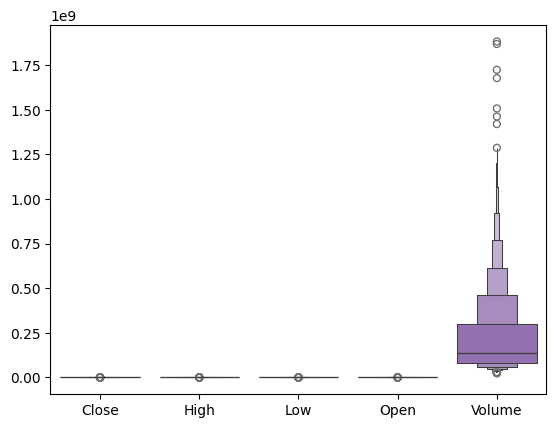

<Figure size 1400x700 with 0 Axes>

In [13]:
sns.boxenplot(data=df)
plt.figure(figsize=(14, 7))

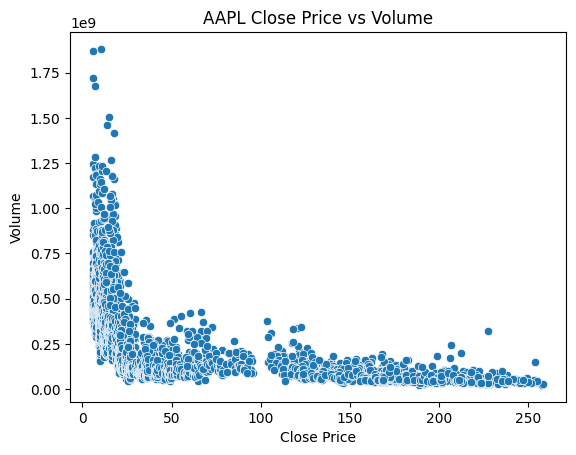

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

In [16]:
# Since df has MultiIndex columns, we need to select specific columns for scatterplot.
# Let's plot 'Close' vs 'Volume' for example.

sns.scatterplot(x=df[('Close', 'AAPL')], y=df[('Volume', 'AAPL')])
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.title('AAPL Close Price vs Volume')
plt.show()
plt.figure(figsize=(14, 7))

<Axes: xlabel='Price-Ticker', ylabel='Price-Ticker'>

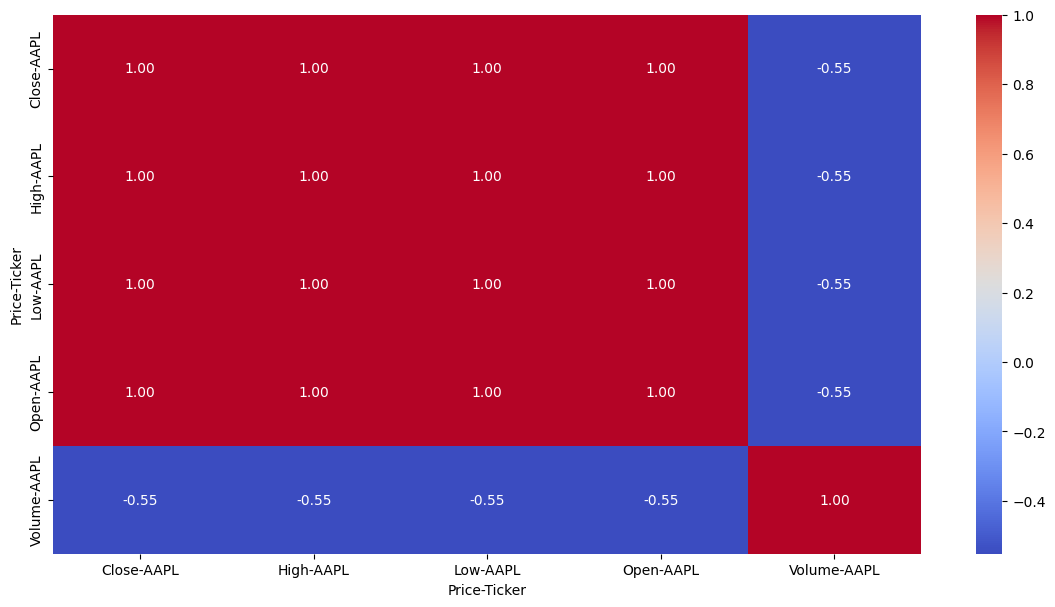

In [17]:
cor = df.corr()
plt.figure(figsize=(14, 7))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt='.2f')

## Data Modelling

In [18]:
X_train = df.drop(columns=[('Close', 'AAPL')])
y_train = df[('Close', 'AAPL')]

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
r2 = r2_score( y_test, y_predict)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))

print(f"r2_score of Linear Regressor: {r2}")
print(f"rmse of Linear Regressor: {rmse}")

r2_score: 0.9999130835017154
rmse: 0.6580068099396079


## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predict = model.predict(X_test)
r2 = r2_score(y_test, predict)
rmse = np.sqrt(mean_squared_error(y_test, predict))

print(f"r2_score of Random Forest Regressor: {r2}")
print(f"rmse of Random Forest Regressor: {rmse}")

r2_score: 0.9997467921951018
rmse: 1.1230984346286537
